In [22]:
# Libraries required
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from matplotlib.pyplot import figure
import statsmodels
import seaborn as sns
import scipy
from scipy import stats
import sklearn 
from sklearn.linear_model import LinearRegression

In [56]:
data = yf.download("KO", start = "1983-12-28", end = "2022-12-23", interval = "1mo")
data.to_csv("store.csv")

[*********************100%***********************]  1 of 1 completed


In [37]:
price = pd.read_csv("store.csv")
price

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/01/1985,1.294271,1.343750,1.244792,1.250000,0.501409,310324800
1,01/01/1986,1.760417,1.770833,1.598958,1.747396,0.730929,288134400
2,01/01/1987,2.359375,2.773438,2.359375,2.664063,1.147235,392235200
3,01/01/1988,2.398438,2.531250,2.234375,2.351563,1.038909,185777600
4,01/01/1989,2.773438,2.929688,2.710938,2.921875,1.329738,205476800
5,01/01/1990,4.828125,4.875000,4.078125,4.304688,2.003598,234900800
6,01/01/1991,5.796875,6.140625,5.328125,6.093750,2.891328,191629600
7,01/01/1992,10.031250,10.421875,8.890625,9.687500,4.671428,229328000
8,01/01/1994,11.156250,11.187500,10.031250,10.218750,5.075104,141999200
9,01/01/1995,12.875000,13.187500,12.187500,13.125000,6.633211,138054400


In [51]:
print(price["Close"])

0      1.250000
1      1.747396
2      2.664063
3      2.351563
4      2.921875
5      4.304688
6      6.093750
7      9.687500
8     10.218750
9     13.125000
10    18.843750
11    28.937500
12    32.375000
13    32.656250
14    28.718750
15    29.000000
16    21.875000
17    20.230000
18    24.620001
19    20.745001
20    20.690001
21    23.940001
22    29.500000
23    21.360001
24    27.125000
25    31.424999
26    33.764999
27    37.240002
28    37.820000
29    41.169998
30    42.919998
31    41.570000
32    47.590000
33    48.130001
34    58.400002
35    48.150002
Name: Close, dtype: float64


In [50]:
#get data
#we will take PE ratio, FCF growth rate, revenue growth rate, D/E ratio
df = pd.read_csv("coca cola key metrics.csv")
df = df.iloc[1:-1]
df["price"] = price["Close"]
df.head()

C:\Users\tszki\AppData\Local\Temp\ipykernel_27544\1841989188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["price"] = price["Close"]


,Date,Gross Margin,EBITDA Margin,Operating Margin,Pretax Margin,Effective Tax Rate,Net Margin,DuPont/Earning Power,Asset Turnover,x Pretax Margin,...,"Hist Price/CF/Shr (dil.), FY","Hist Price/FCF/Shr (dil.), FY","Hist Price/OCF/Shr (dil.), FY","Hist Price/FOCF/Shr (dil.), FY","Hist Price/Comm Eqty, FY","Hist Price/Tang Comm Eqty, FY","Hist Price/Bk, Tot Eqty, FY","Hist Price/Tang Bk, Tot Eqty, FY","Hist Div Yield Comm Stk Primary, %, FY",price
1,1984,0.460,0.193,0.150,0.156,0.398,0.094,NaN,1.18,0.156,...,9.13,34.22,10.60,71.09,2.94,3.77,2.94,3.77,4.42%,1.747396
2,1985,0.465,0.155,0.136,0.148,0.363,0.094,NaN,1.13,0.148,...,13.66,1108,14.75,-,3.65,4.51,3.65,4.51,3.52%,2.664063
3,1986,0.505,0.177,0.182,0.201,0.335,0.134,NaN,0.98,0.201,...,13.41,42.95,20.54,-,4.14,4.27,4.14,4.27,2.75%,2.351563
4,1987,0.526,0.198,0.173,0.178,0.364,0.113,NaN,0.95,0.178,...,14.06,48.44,11.88,29.67,4.45,4.56,4.45,4.56,2.94%,2.921875
5,1988,0.575,0.219,0.198,0.202,0.330,0.135,NaN,1,0.202,...,13.04,38.63,13.85,46.68,5.20,8.2,4.73,7.1,2.69%,4.304688


In [24]:
cols = list(df.columns.values)
print(cols)

['Date', 'Gross Margin', 'EBITDA Margin', 'Operating Margin', 'Pretax Margin', 'Effective Tax Rate', 'Net Margin', 'DuPont/Earning Power', 'Asset Turnover', 'x Pretax Margin', 'Pretax ROA', 'x Leverage (Assets/Equity)', 'Pretax ROE', 'x Tax Complement', 'ROE', 'x Earnings Retention', 'Reinvestment Rate', 'Liquidity', 'Quick Ratio', 'Current Ratio', 'Times Interest Earned', 'Cash Cycle (Days)', 'Leverage', 'Assets/Equity', 'Debt/Equity', '% LT Debt to Total Capital', '(Total Debt - Cash) / EBITDA', 'Operating', 'A/R Turnover', 'Avg. A/R Days', 'Inv Turnover', 'Avg. Inventory Days', 'Avg. A/P Days', 'Fixed Asset Turnover', 'WC / Sales Growth', 'Bad Debt Allowance (% of A/R)', 'ROIC', 'Revenue per Employee ($)', 'Sales/Receivables, FY', 'Revenue/Inventory, FY', 'Revenue/Wk Cap, FY', 'Revenue/Tot Assets, FY', 'EBITDA/Comm Shr Eqty, %, FY', 'EBITDA/Tot Eqty, %, FY', 'EBITDA/Tot Assets, %, FY', 'ROFA Fixed Assets, %, FY', 'ROE Comm Eqty, %, FY', 'ROA Tot Assets, %, FY', 'Inc Avail Comm/Tot E

In [25]:
df.fillna("ffill")
df

,Date,Gross Margin,EBITDA Margin,Operating Margin,Pretax Margin,Effective Tax Rate,Net Margin,DuPont/Earning Power,Asset Turnover,x Pretax Margin,...,"Hist P/E Normalized (dil), FY","Hist Price/CF/Shr (dil.), FY","Hist Price/FCF/Shr (dil.), FY","Hist Price/OCF/Shr (dil.), FY","Hist Price/FOCF/Shr (dil.), FY","Hist Price/Comm Eqty, FY","Hist Price/Tang Comm Eqty, FY","Hist Price/Bk, Tot Eqty, FY","Hist Price/Tang Bk, Tot Eqty, FY","Hist Div Yield Comm Stk Primary, %, FY"
0,1983,0.455,0.181,0.148,0.149,0.442,0.083,NaN,-,0.149,...,13.18,9.43,227.75,7.39,29.75,2.50,3.15,2.50,3.15,4.99%
1,1984,0.460,0.193,0.150,0.156,0.398,0.094,NaN,1.18,0.156,...,13.30,9.13,34.22,10.60,71.09,2.94,3.77,2.94,3.77,4.42%
2,1985,0.465,0.155,0.136,0.148,0.363,0.094,NaN,1.13,0.148,...,16.34,13.66,1108,14.75,-,3.65,4.51,3.65,4.51,3.52%
3,1986,0.505,0.177,0.182,0.201,0.335,0.134,NaN,0.98,0.201,...,18.15,13.41,42.95,20.54,-,4.14,4.27,4.14,4.27,2.75%
4,1987,0.526,0.198,0.173,0.178,0.364,0.113,NaN,0.95,0.178,...,16.15,14.06,48.44,11.88,29.67,4.45,4.56,4.45,4.56,2.94%
5,1988,0.575,0.219,0.198,0.202,0.330,0.135,NaN,1,0.202,...,15.09,13.04,38.63,13.85,46.68,5.20,8.2,4.73,7.1,2.69%
6,1989,0.588,0.221,0.207,0.204,0.324,0.138,NaN,1.1,0.204,...,23.84,19.88,66.99,23.75,148.79,8.17,8.82,7.47,8,1.76%
7,1990,0.589,0.214,0.191,0.197,0.314,0.135,NaN,1.17,0.197,...,23.08,19.58,68.24,24.50,227.95,8.23,8.88,8.07,8.69,1.72%
8,1991,0.598,0.223,0.200,0.206,0.321,0.140,NaN,1.19,0.206,...,33.44,28.79,121.23,25.94,82.93,12.58,13.55,12.58,13.55,1.20%
9,1992,0.613,0.237,0.212,0.210,0.314,0.144,NaN,1.23,0.210,...,29.63,25.31,144.72,25.03,135.92,14.07,15.61,14.07,15.61,1.34%


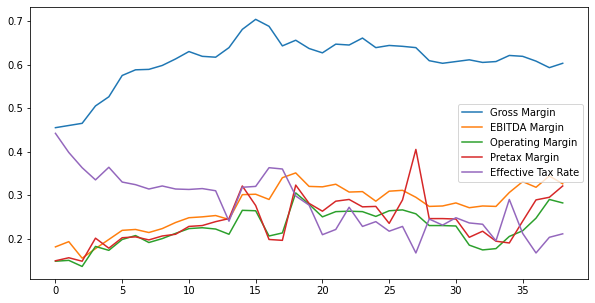

In [27]:
df[cols[1:6]].plot(figsize=(10, 5))
plt.show()

                                     Date  Gross Margin  EBITDA Margin  \
Date                             1.000000      0.464894       0.762945   
Gross Margin                     0.464894      1.000000       0.764672   
EBITDA Margin                    0.762945      0.764672       1.000000   
Operating Margin                 0.491533      0.719861       0.817382   
Pretax Margin                    0.505604      0.618992       0.693751   
Effective Tax Rate              -0.839363     -0.475050      -0.636186   
Net Margin                       0.630367      0.580327       0.706917   
DuPont/Earning Power                  NaN           NaN            NaN   
x Pretax Margin                  0.505604      0.618992       0.693751   
x Leverage (Assets/Equity)       0.592253     -0.003163       0.246401   
x Tax Complement                 0.214096      0.151510       0.144772   
x Earnings Retention            -0.627547      0.046418      -0.364118   
Liquidity                             

<AxesSubplot:>

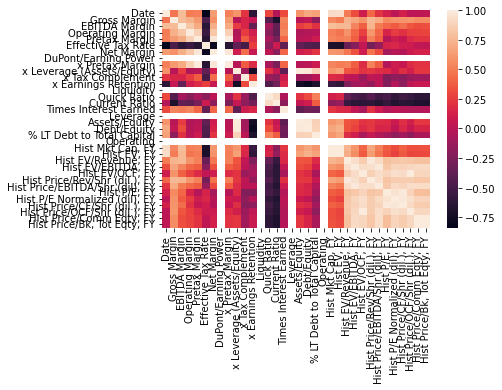

In [28]:
print(df.corr())
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
#model creation
import statsmodels.api as sm

#define response variable
y = df['BP']

#define predictor variables
#tax rate, gross margin, inventory turnover
x = df['Effective Tax Rate', 'Gross Margin', 'Inv Turnover']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())